## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [67]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [68]:
customer_set = pd.read_csv('Mall_Customers.csv')

customer_set = customer_set.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "SpendingScore"})

customer_set

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [69]:
customer_set

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [70]:
customer_set.dtypes

CustomerID        int64
Gender           object
Age               int64
Income            int64
SpendingScore     int64
dtype: object

In [71]:
customer_set.shape

(200, 5)

In [72]:
customer_set.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Income  SpendingScore
0             1    Male   19      15             39
1             2    Male   21      15             81
2             3  Female   20      16              6
3             4  Female   23      16             77
4             5  Female   31      17             40
..          ...     ...  ...     ...            ...
195         196  Female   35     120             79
196         197  Female   45     126             28
197         198    Male   32     126             74
198         199    Male   32     137             18
199         200    Male   30     137             83

[200 rows x 5 columns]>

In [73]:
customer_set.isnull().sum()

CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [74]:
# customer_set = customer_set.drop(columns=["CustomerID"])

customer_set

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

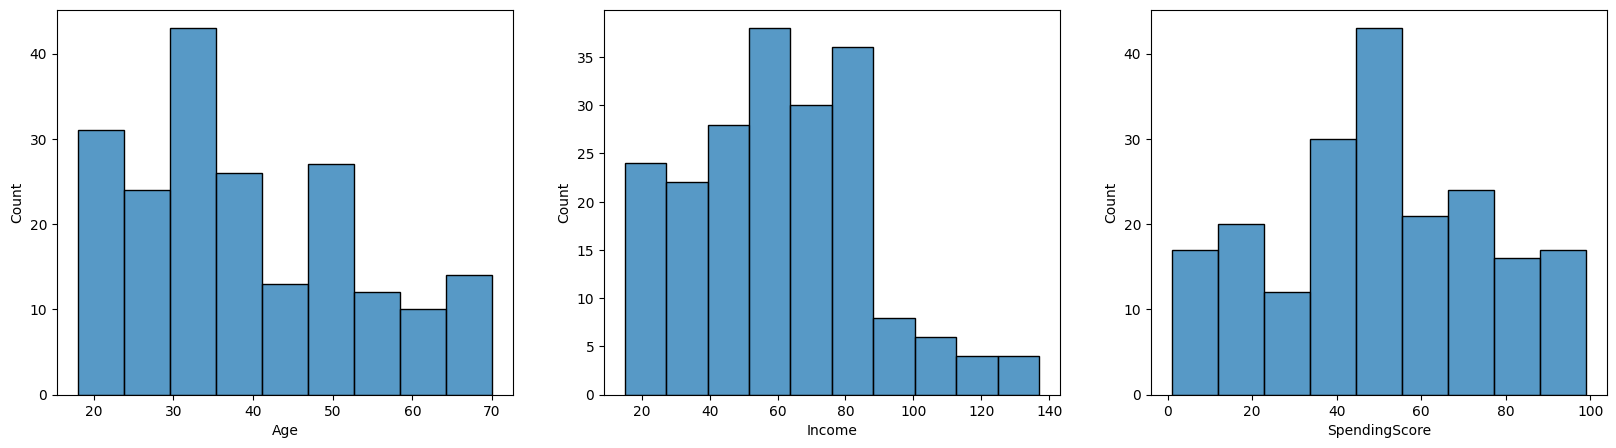

In [75]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(customer_set, x='Age', ax=axes[0])
sns.histplot(customer_set, x='Income', ax=axes[1])
sns.histplot(customer_set, x='SpendingScore', ax=axes[2])

plt.show()

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

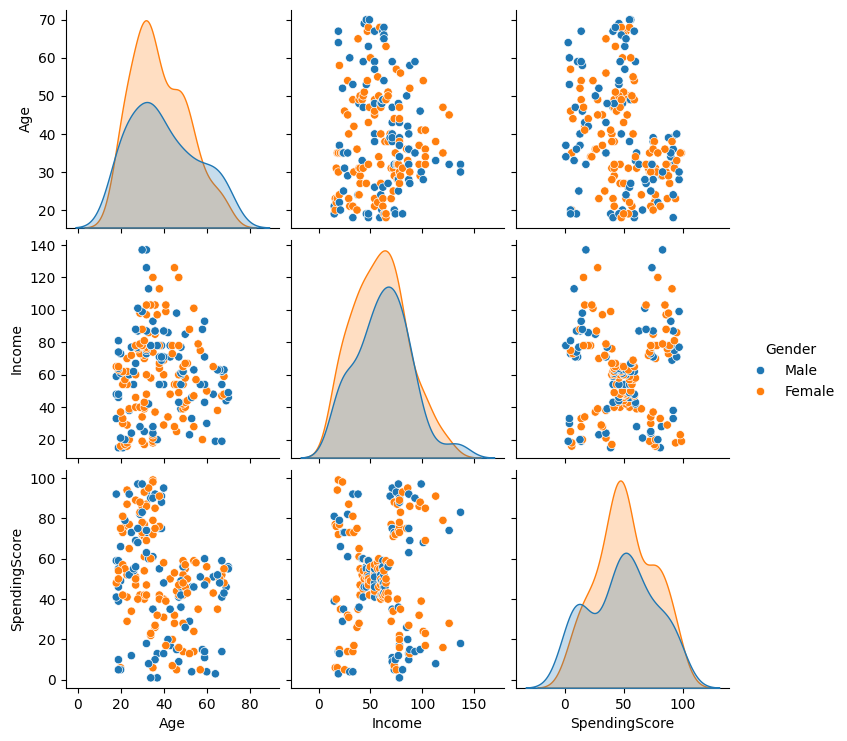

In [76]:
sns.pairplot(customer_set, hue='Gender', vars=['Age', 'Income', 'SpendingScore'])

plt.show()

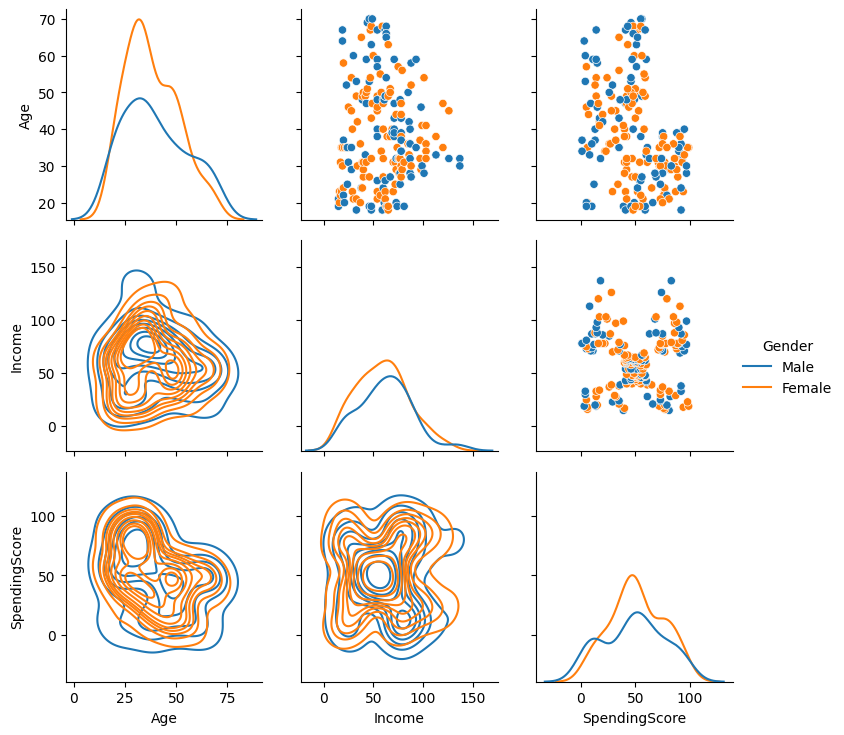

In [77]:
g = sns.PairGrid(customer_set, hue='Gender', vars=['Age', 'Income', 'SpendingScore'])
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot, lw=1)
g.add_legend()

plt.show()

**Висновки з 1-4 завдання (детальні)**

1.   Було проаналізовано атрибути вибірки (`CustomerID`, `Gender`, `Age`, `Income` та `SpendingScore`), визначено розмірність датасету (200, 5), виведено основну статистичну інформацію по числовим змінним і перевірено на наявність `NaN` значень, яких вибірка не має.
2.   Було видалено змінну `CustomerID`, так як ця змінна не впливає на аналіз даних.
3.   Було побудовано діаграми розподілу по змінним `Age`, `Income` та `SpendingScore`. Проаналізувавши дані діаграми, можна зробити висновки, що більшість осіб є віком 30-35 років, дохід переважно сягає 60-80 тис. доларів і рівень витрат дорівнює приблизно 50%.
4.   Було побудовано графіки `pairplot` для аналізу змінних `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. На графіку по всім змінним `Gender` можна спостерігати прояви п'яти кластерів у даному датасеті. З використанням `sns.PairGrid` було виявлено можливість наявності трьох кластерів.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Ratio by Gender:
Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64


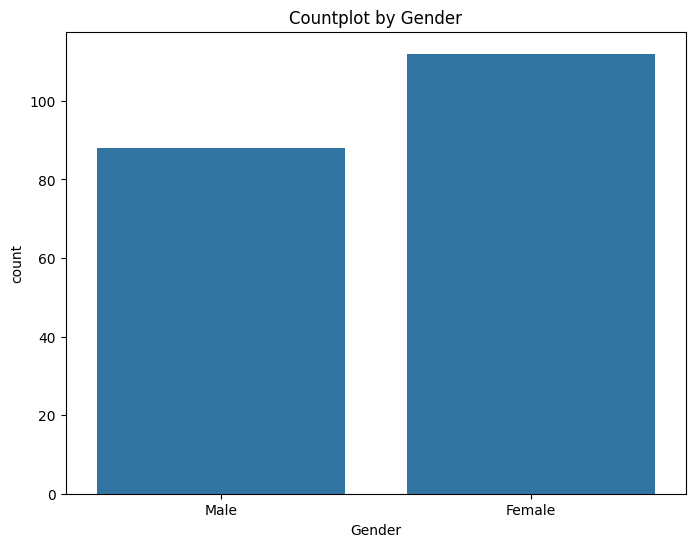

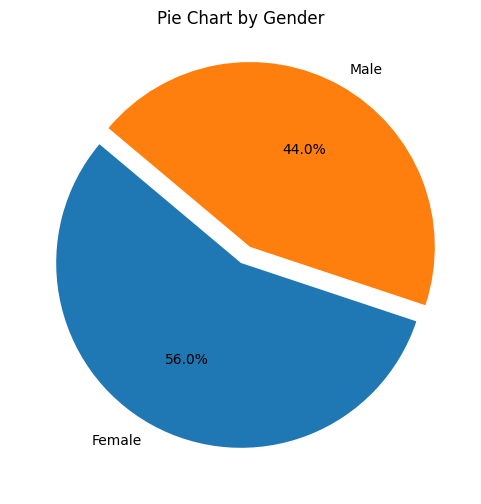

In [78]:
gender_ratio = customer_set['Gender'].value_counts(normalize=True)
print("Ratio by Gender:")
print(gender_ratio)

plt.figure(figsize=(8, 6))
sns.countplot(x ='Gender', data=customer_set)
plt.title('Countplot by Gender')
plt.show()

plt.figure(figsize=(6, 6))
plt.pie(gender_ratio, labels=gender_ratio.index, autopct='%1.1f%%', startangle=140, explode=[0, 0.1])
plt.title('Pie Chart by Gender')
plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

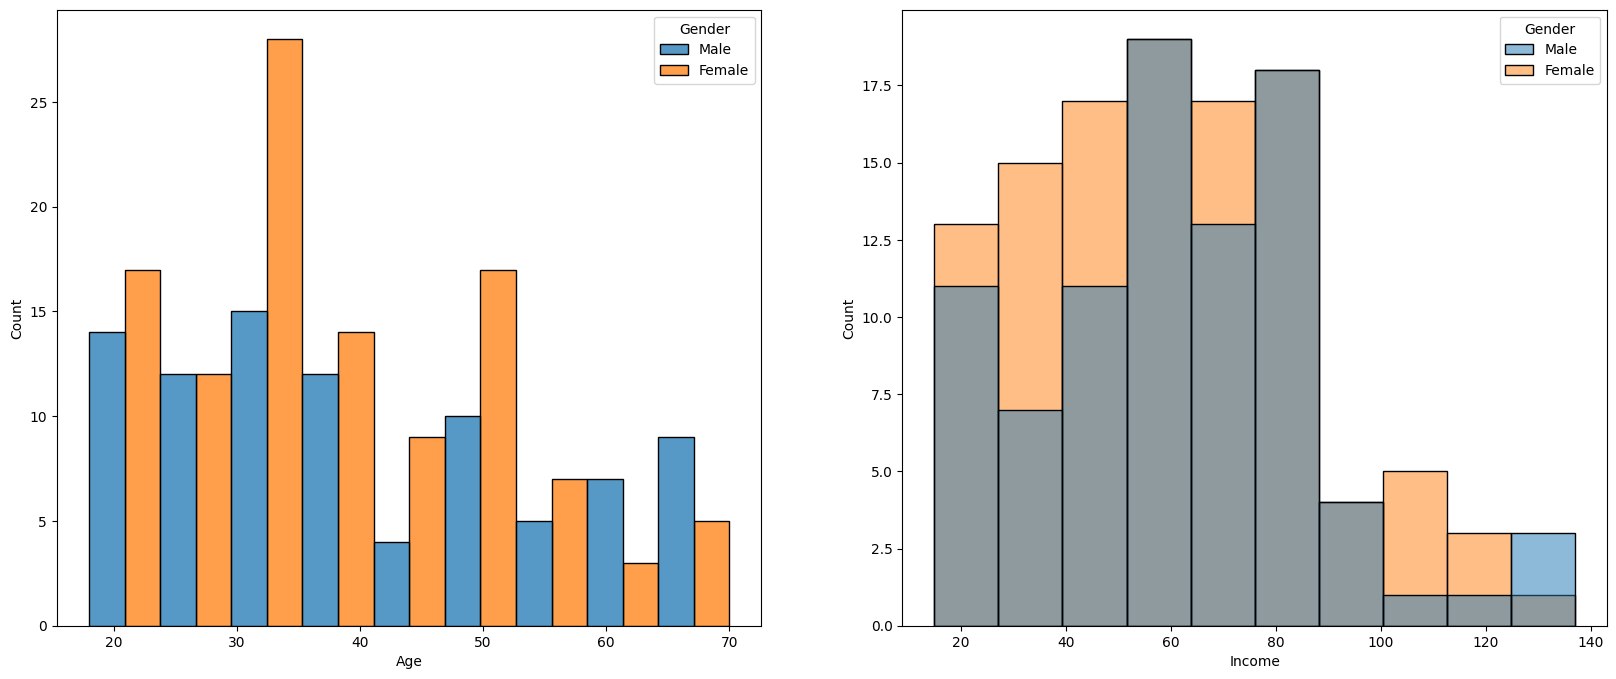

In [79]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 8))

sns.histplot(customer_set, x="Age", hue="Gender", ax=axes[0], multiple='dodge')
sns.histplot(customer_set, x="Income", hue="Gender", ax=axes[1], multiple='layer')

plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



<Axes: xlabel='SpendingScore', ylabel='Count'>

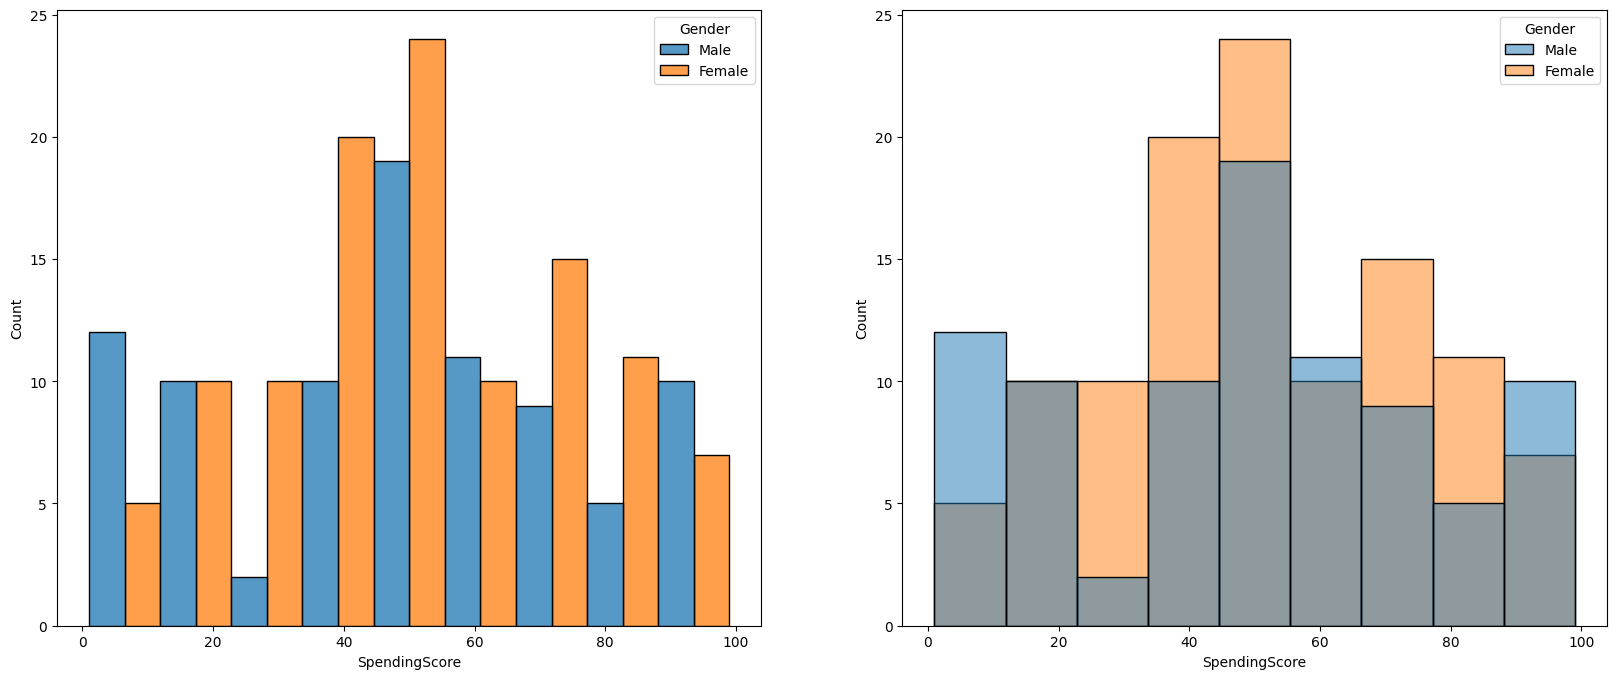

In [80]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 8))

sns.histplot(customer_set, x="SpendingScore", hue="Gender", ax=axes[0], multiple='dodge')
sns.histplot(customer_set, x="SpendingScore", hue="Gender", ax=axes[1], multiple='layer')

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

<Axes: ylabel='SpendingScore'>

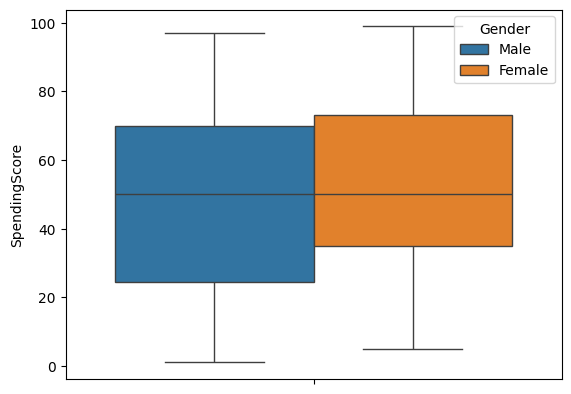

In [81]:
sns.boxplot(customer_set, y='SpendingScore', hue='Gender')

**Висновки з завдання 5 - 8(детальні)**

1.   `Яке співвідношення груп чоловіків та жінок?`
- За результатами аналізу було виявлено, що жінок більше за чоловіків (56% до 44%)
2.   `Подивитись які можна виділити групи і як розподілені витрати відностно статі людини? -дохід замість витрат?`
- Згідно побудованих графіків можна виділити 3 групи: люди з низьким рівнем доходу, середнім та високим. Відносно статі, більшість жінок має низький і високий рівень доходу, тоді як чоловіки переважно мають середній рівень доходу.
3. `Чи є різниця між витратами у чоловіків та жінок?`
- Витрати жінок є трохи вищими за витрати чоловіків.
4. Було побудовано `boxplot` по змінній `SpendingScore` і можна зробити такий висновок: витрати у чоловіків знаходяться у діапазоні 25-70%, тоді коли у жінок цей показник сягає 35-75%.

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що вона не знадобиться в наступних дослідженнях;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

Text(0, 0.5, 'Inertia')

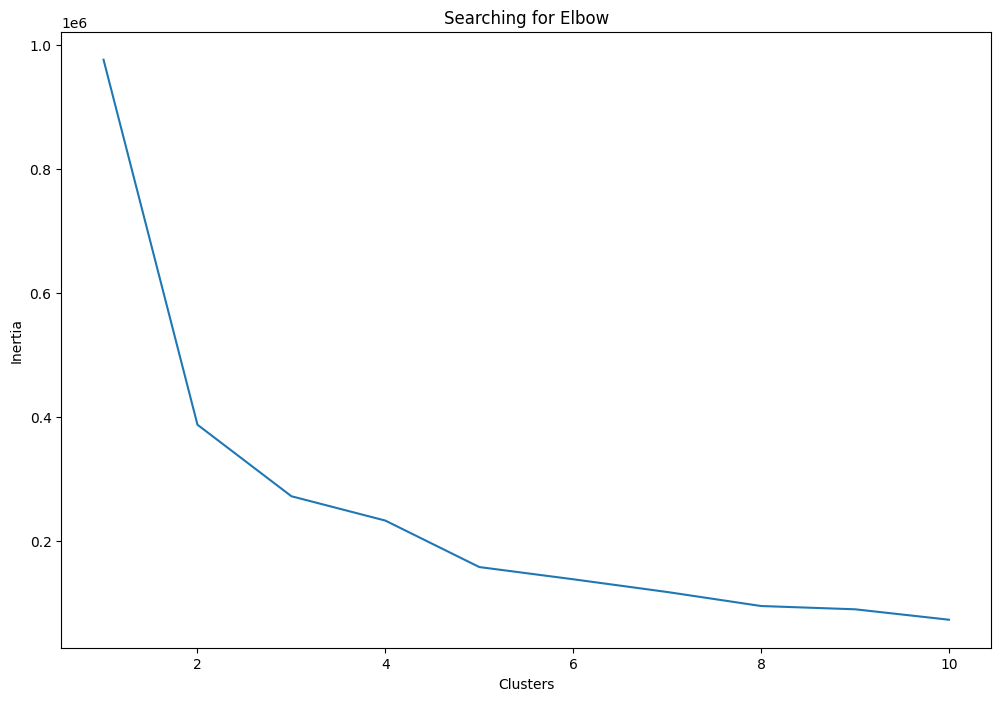

In [82]:
X = customer_set.drop(['Gender'], axis=1)
clusters = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=5)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

**Висновки з завдання 9 (детальні)** 

1.  `Необхідно навести яка кількість кластерів на Вашу думку є оптимальною (краще розглянути для порівняння делька гіпотез про кількість кластерів)`
- Після проведення аналізу методом `elbow`, кількість кластерів у даних здається більшою (приблизно шість додаткових кластерів)

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

<Axes: xlabel='Income', ylabel='SpendingScore'>

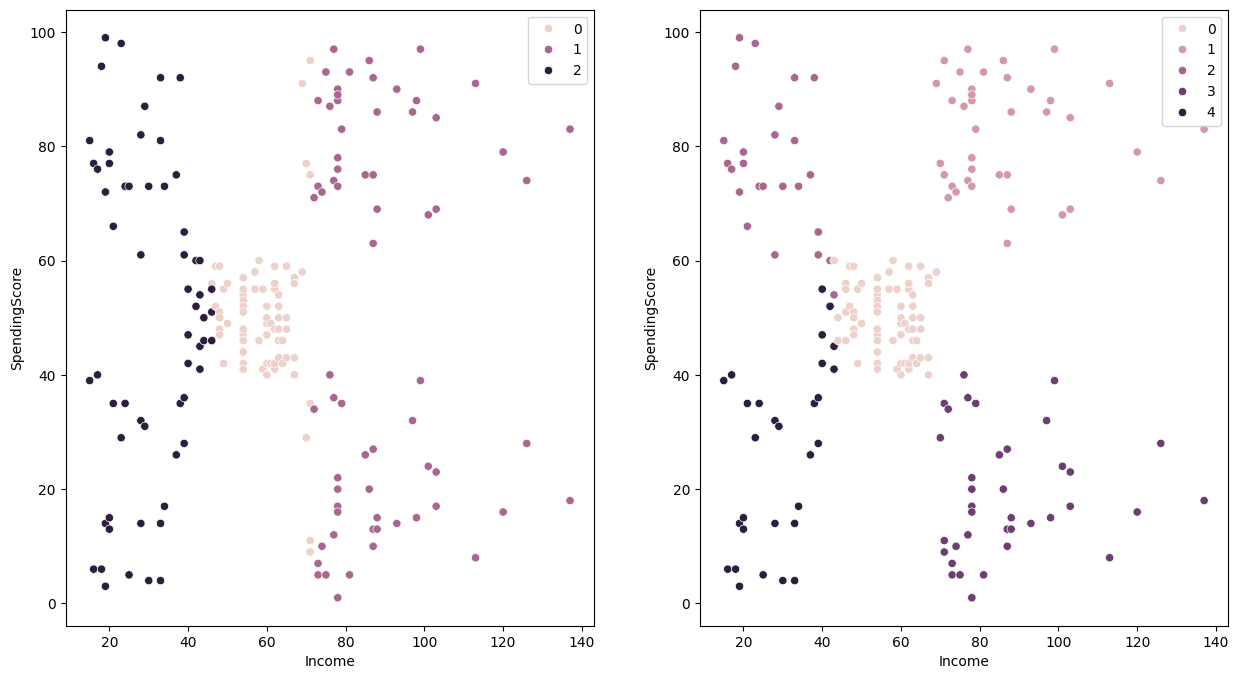

In [83]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_5 = KMeans(n_clusters=5, random_state=42)

kmeans_3.fit(X)
kmeans_5.fit(X)

fig, axes = plt.subplots(ncols=2, figsize=(15, 8))

sns.scatterplot(customer_set, x='Income', y='SpendingScore', hue=kmeans_3.labels_, ax=axes[0])
sns.scatterplot(customer_set, x='Income', y='SpendingScore', hue=kmeans_5.labels_, ax=axes[1])

**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [84]:
fig_3 = px.scatter_3d(customer_set, x='Income', y='SpendingScore', z='Age', color=kmeans_3.labels_, symbol=kmeans_3.labels_, opacity=0.7)
fig_5 = px.scatter_3d(customer_set, x='Income', y='SpendingScore', z='Age', color=kmeans_5.labels_, symbol=kmeans_5.labels_, opacity=0.7)

fig_3.show()
fig_5.show()

**Висновки з завдання 10 - 11 (детальні)** 

1. Визначитись з отриманих візуалізацій яка кількість кластерів є оптимальною на Вашу думку і провести аналіз кластерів, що Ви отримали.
2. Було створено двовимірну візуалізацію методу К-середніх з трьома і п'ятьма кластерами. Згідно візуалізацій, розташування точок на першій (з трьома кластерами) вказує на наявність 5 кластерів. Розташування точок на другій візуалізації (з п'ятьма кластерами) можна вважати підходящим варіантом.
3. Було створено візуалізацію кластеризації методу К-середніх з використанням `scatter_3d`. Згідно візуалізацій, можна припустити що 5-6 кластерів є оптимальним варіантом.


## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


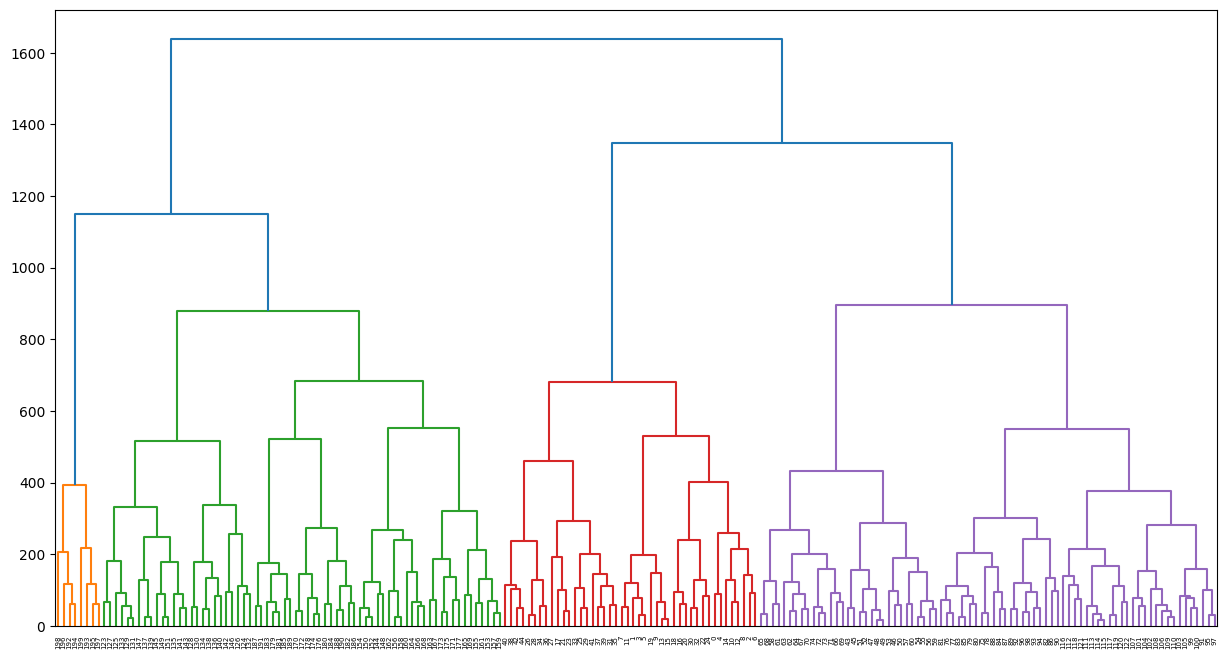

In [85]:
matrix_data = customer_set.drop(['Gender'], axis=1)
dist_matrix = distance_matrix(matrix_data.values, matrix_data.values)

agglomerative_clustering = AgglomerativeClustering(n_clusters=5, linkage='complete')
agglomerative_labels = agglomerative_clustering.fit_predict(matrix_data)

plt.figure(figsize=(15, 8))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(dist_matrix, method='complete'))

plt.show()

**Висновки з завдання 12 (детальні)**

1. Було кластеризовано датасет за допомогою агломеративної ієрархічної кластеризації з п'ятьма кластерами. На візуалізації дендрограми можна спостерігати поділ на 5 груп. Один з кластерів є досить великим, що може означати можливість його поділу на ще два кластери.

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

Text(0.5, 1.0, 'Agglomerative clustering')

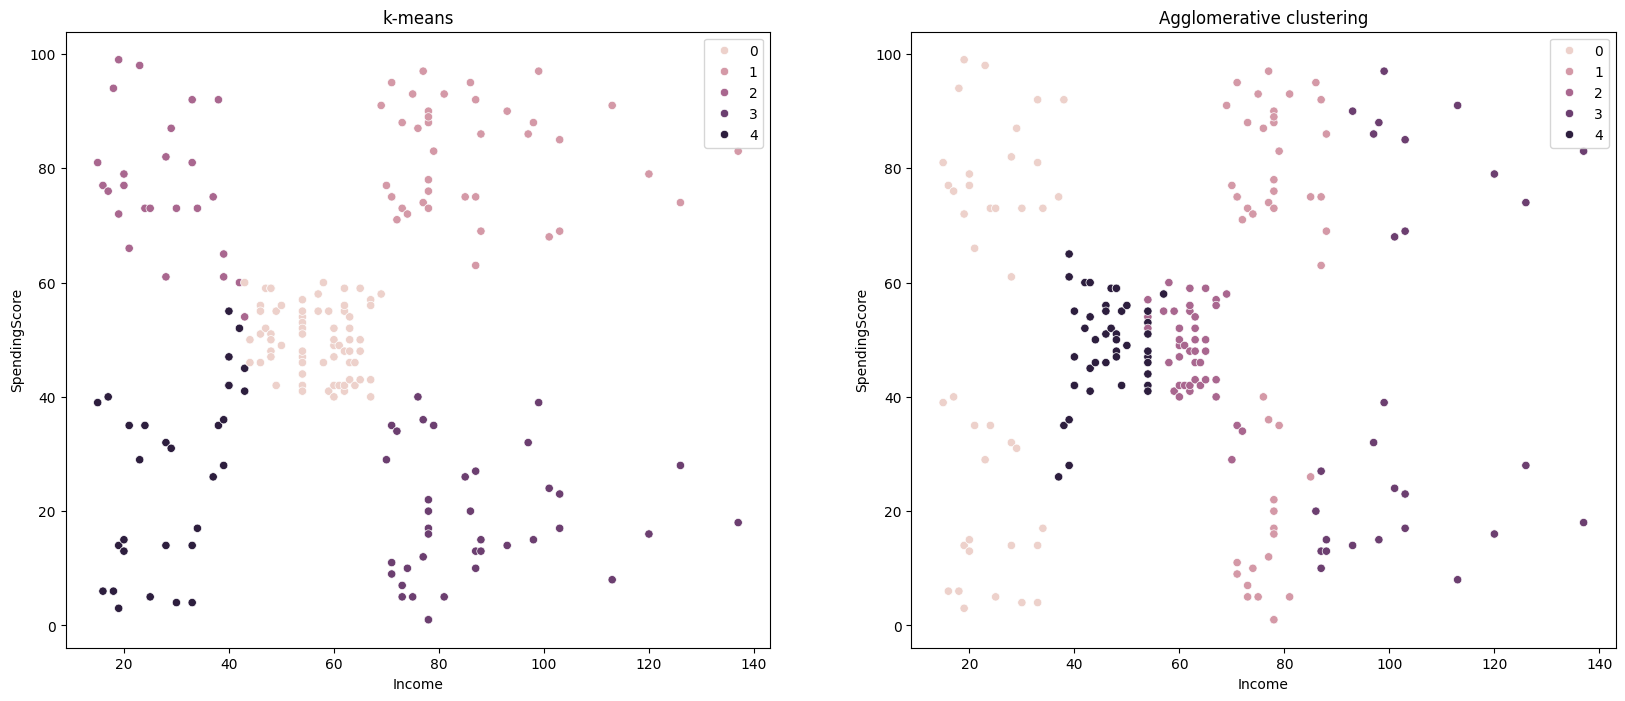

In [86]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 8))

sns.scatterplot(customer_set, x='Income', y='SpendingScore', hue=kmeans_5.labels_, ax=axes[0])
axes[0].set_title('k-means')

sns.scatterplot(customer_set, x='Income', y='SpendingScore', hue=agglomerative_labels, ax=axes[1])
axes[1].set_title('Agglomerative clustering')

**Висновки з завдання 13 (детальні)**

1. Було використано 5 кластерів для фінальних візуалізацій і проведено порівняльний аналіз отриманих результатів кластеризації розглянутими методами. В обох випадках результати є непоганими, але метод K-means має дещо краще розподілення точок ніж агломеративне кластерування.